In [3]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-
import sys
import csv
import json
import pprint
from pymongo import MongoClient
import numpy as np
import seaborn as sns
import collections
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
client = MongoClient('localhost',27017)
db = client.twitter
posts = db["posts"]

In [3]:
# count retweets for every post
data = []
for entry in posts.find():
    if db["users"].find_one({"tweet_id": entry["id"]}):
        data.append(entry['retweet_count'])

/tmp/ipykernel_56100/2812826434.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ds = pd.Series(data, index=range(len(data)))


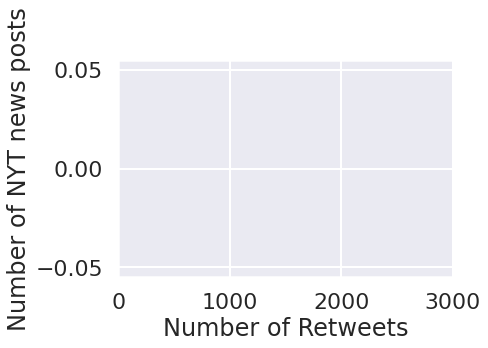

In [9]:
ds = pd.Series(data, index=range(len(data)))
sns.set_context("poster")
with sns.axes_style("darkgrid"):
    ds.plot.hist(bins=500)
    plt.xlim(0, 3000)
    plt.xlabel('Number of Retweets')
    plt.ylabel('Number of NYT news posts')
    plt.show()
    # plt.savefig("fig/Retweets_per_post.png")

In [5]:
users = db["user_merge"]

In [6]:
# 
data = []
for entry in users.find():
    data.append(entry['count'])

/tmp/ipykernel_56100/4026791530.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ds = pd.Series(data, index=range(len(data)))


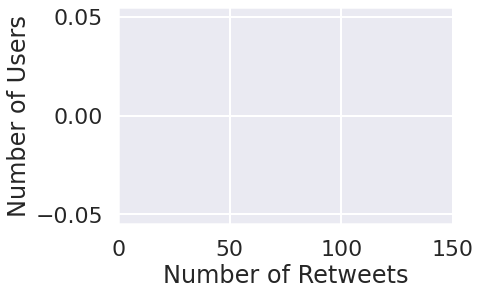

In [8]:
ds = pd.Series(data, index=range(len(data)))
with sns.axes_style("darkgrid"):
    ds.plot.hist(bins=500)
    plt.xlim(0, 150)
    plt.xlabel('Number of Retweets')
    plt.ylabel('Number of Users')
    plt.show()
    # plt.savefig("fig/Retweets_per_user.png")

In [10]:
import pprint

def SaveDict(filename, mode, root):
    if filename[-4:]!=".txt":
        filename+=".txt"
    with open(filename, mode) as f:
        f.write(pprint.pformat(root))

def LoadDict(filename):
    if filename[-4:]!=".txt":
        filename+=".txt"
    with open(filename, "r") as f:
        return eval(f.read())

In [11]:
# find users that retweeted the post in database 
import pickle
import json
articles = []
for article in db.articles.find():
    if db.retweeter_list.find_one({"tweet_id": article["id"]}):
        retweets = db.retweeter_list.find_one({"tweet_id": article["id"]})["retweeters"]
    articles.append({"title": article["title"], "users": retweets})
json.dump(articles,open('./data/article_users.json','wb')) 

FileNotFoundError: [Errno 2] No such file or directory: './data/article_users.json'